In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import sys
from pathlib import Path

sys.path.append(str(Path.cwd().parent))

In [3]:
import pandas as pd
import numpy as np
from statsmodels.graphics import tsaplots
from statsmodels.stats import diagnostic
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import scipy

from load_dataset import Dataset
import plotting

In [4]:
dataset = Dataset('../data/dataset/')

In [89]:
# Возьмем временной ряд.

In [6]:
ts = dataset['international-airline-passengers.csv']

/home/nikita/Документы/time_series_course/ts_march_2023/load_dataset.py:34: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  ts = pd.read_csv(


In [91]:
# нарисуем. Видим ярко выраженную сезонность (мб не одну?), гетероскедастичность и тренд.

<Axes: xlabel='1949-01'>

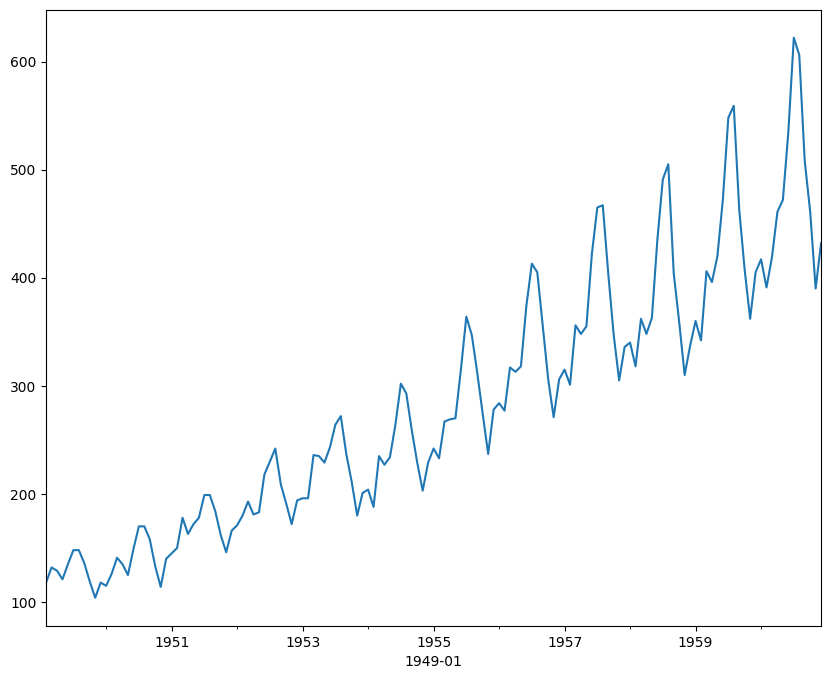

In [7]:
ts.plot(figsize=(10, 8))

In [93]:
# Посммотрим график автокорреляций - видим тренд и сильную цикличную автокореляцию

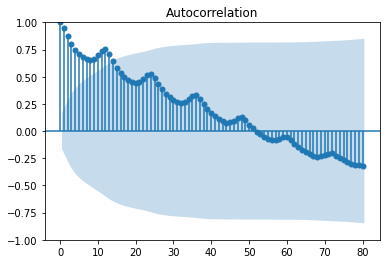

In [94]:
tsaplots.plot_acf(ts, lags=80);

In [95]:
# проверим автокорреляция при помощи теса Ланга-Бокса

In [96]:
res = diagnostic.acorr_ljungbox(ts)

In [97]:
p_value = res['lb_pvalue']

In [98]:
# видим, что значения p-value сильно ниже порога (обычно 0.05, 0.01), значит мы смело отвергаем нулевую гипотезу
# то есть данные явно не случайны
max(p_value), min(p_value)

(2.2652961479646928e-30, 1.4807047715344168e-175)

In [99]:
# проверим ряд на стационарость критерием Дики-Фуллера
# видим, что p-value сильно выше порога, значит мы никак не можем отвергнуть нулевую гипотезу, следовательно -
# ряд не стационарен
p_value = adfuller(ts)[1]
p_value

0.9915115096288659

In [100]:
# Попробуем сделать его стационарным
# Для начала постараемся избавиться от гетероскедастичности, взяв логарифм
ts_log = np.log(ts)

<AxesSubplot:xlabel='1949-01'>

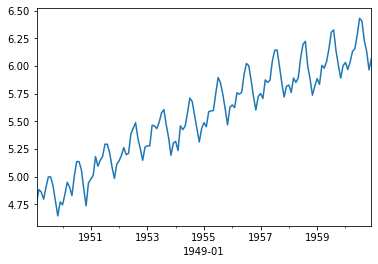

In [101]:
ts_log.plot()
# отлично, на вид, гетероскедастичность ушла

In [102]:
# впрочем, наши статистические тесты остались этим неудовлетворены и снова показывают крайнюю нестационарность
# скоррелированность
res = diagnostic.acorr_ljungbox(ts_log)
p_value = res['lb_pvalue']
print(min(p_value), max(p_value))
print(adfuller(ts)[1])

4.552029430392305e-201 9.436327894354704e-31
0.9915115096288659


In [103]:
# чтож, попробуем применить дифференцирование
ts_diff = ts_log.diff()

In [104]:
plotting.plot_ts(ts_log, ts_diff)

Loading BokehJS ...

In [106]:
res = diagnostic.acorr_ljungbox(ts_diff.dropna(), lags=70)
p_value = res['lb_pvalue']

print(min(p_value), max(p_value))
print(adfuller(ts_diff.dropna())[1])

4.0377134029604414e-107 0.02104816426436633
0.048033972528752085


<AxesSubplot:xlabel='1949-01'>

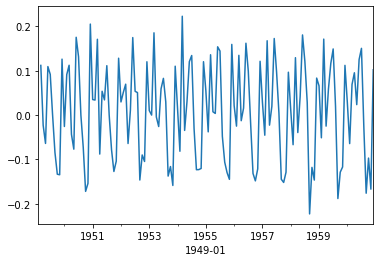

In [108]:
ts_diff.plot()

In [110]:
# кхмм, опять не помогает, давайте посмотрим на график автокорреляций и увидим, что период сезонности 
# приходится на 12 лаг, попробуем сезонное дифференцирование

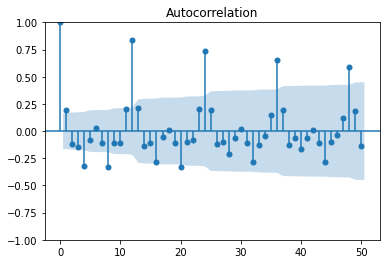

In [112]:
tsaplots.plot_acf(ts_diff.dropna(), lags=50);

In [113]:
ts_season_diff = ts_diff.diff(12)

In [116]:
res = diagnostic.acorr_ljungbox(ts_season_diff.dropna(), lags=45)

p_value = res['lb_pvalue']
print(min(p_value), max(p_value))
print(adfuller(ts_season_diff.dropna())[1])

6.188062493682463e-07 0.0025904863525081454
0.00016009049261960388


<AxesSubplot:xlabel='1949-01'>

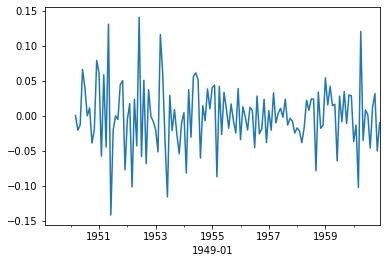

In [43]:
ts_season_diff.plot()

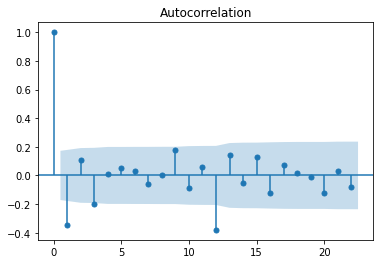

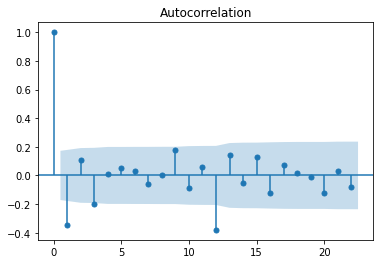

In [44]:
tsaplots.plot_acf(ts_season_diff.dropna())

In [117]:
# Бонус - пример простого обратно трансформирования ряда. По сути, к ряду просто применяются обратные операторы.
# exp для log, кумулятивная сумма для дифференцирования

In [118]:
ts = dataset['hour_3553.csv']

/Users/g.sinyakov/ts_winter/load_dataset.py:34: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  ts = pd.read_csv(


<AxesSubplot:xlabel='2019-05-19T03:00:00'>

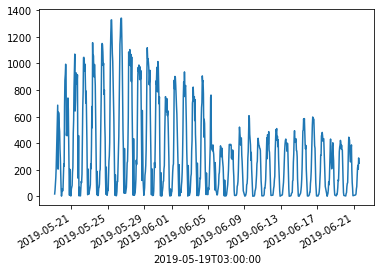

In [119]:
ts.plot()

In [120]:
transformed = np.log(ts).diff()

<AxesSubplot:xlabel='2019-05-19T03:00:00'>

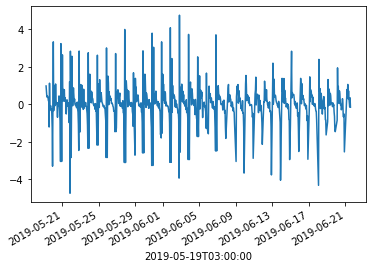

In [121]:
transformed.plot()

In [122]:
back_transformed = np.exp(transformed.cumsum())

<AxesSubplot:xlabel='2019-05-19T03:00:00'>

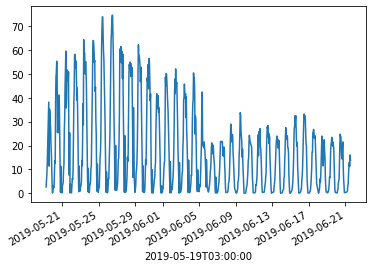

In [123]:
back_transformed.plot()

## Задание:
    1. Выбрать ряд stl_example.csv.
    2. Используя вышеперечисленные преобразования, добиться стационарности ряда.
    3. Критерием стационарности будет служить значение p-value теста Дики-Фуллера, меньшее 0.05 и соответствующий график.

In [8]:
ts = dataset['stl_example.csv']

/home/nikita/Документы/time_series_course/ts_march_2023/load_dataset.py:34: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  ts = pd.read_csv(


In [9]:
ts

2019-01-01 00:00:00    2.156403
2019-01-01 01:00:00    2.859954
2019-01-01 02:00:00    3.041739
2019-01-01 03:00:00    2.242690
2019-01-01 04:00:00    1.168226
                         ...   
2019-01-09 03:00:00    2.975522
2019-01-09 04:00:00    3.815204
2019-01-09 05:00:00    3.801927
2019-01-09 06:00:00    2.815091
2019-01-09 07:00:00    2.157788
Name: 0, Length: 200, dtype: float64

<Axes: >

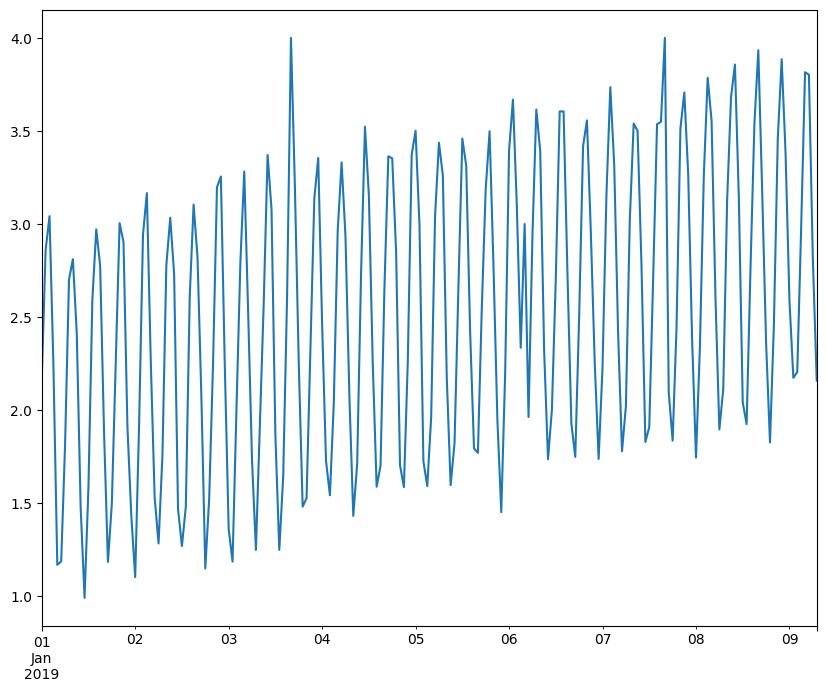

In [10]:
ts.plot(figsize=(10, 8))

In [18]:
# гетероскедастичности я не вижу, нужно избивиться от тренда

In [21]:
# чтож, попробуем применить дифференцирование
ts_diff = ts.diff()

In [22]:
plotting.plot_ts(ts, ts_diff)

Loading BokehJS ...

In [23]:
#нужно еще убрать сезонность

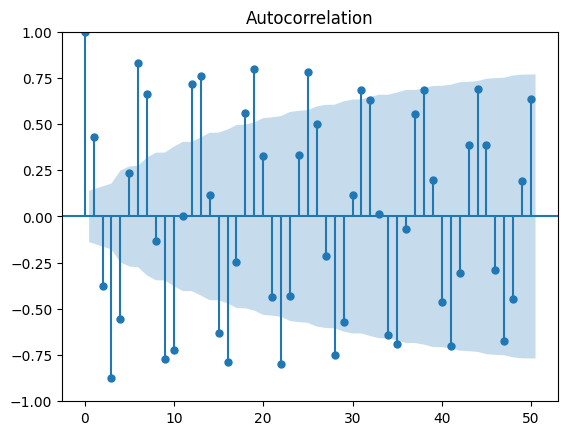

In [24]:
tsaplots.plot_acf(ts_diff.dropna(), lags=50);

In [25]:
#период где-то 5-9

In [29]:
for i in range(5,10):
    ts_diff.diff(i)
    print(i,":" ,adfuller(ts_diff.diff(i).dropna())[1])

5 : 5.527069111263731e-10
6 : 4.728845378199677e-19
7 : 1.599555480043653e-17
8 : 6.503119135426674e-05
9 : 2.0769594035176856e-13


In [30]:
#видимо, сезонность 6

<Axes: >

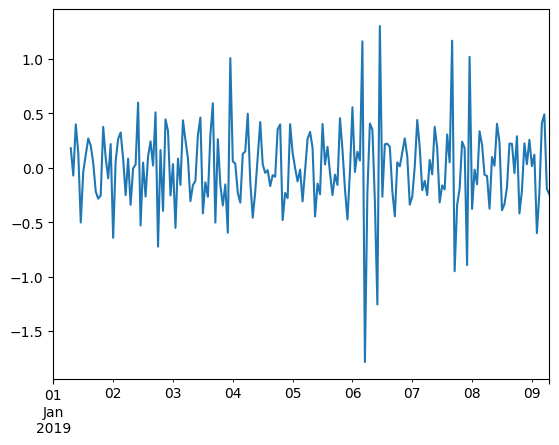

In [53]:
ts_season_diff = ts_diff.diff(6.8)
ts_season_diff.plot()

In [51]:
res = diagnostic.acorr_ljungbox(ts_season_diff.dropna(), lags=70)
p_value = res['lb_pvalue']

print(min(p_value), max(p_value))
print(adfuller(ts_season_diff.dropna())[1])

1.284069380147264e-62 0.0021645284819565855
4.728845378199677e-19


<Axes: >

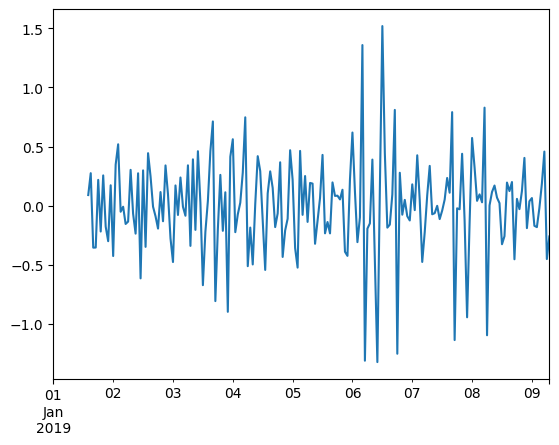

In [55]:
ts_exp = ts_season_diff.diff(7)
ts_exp.plot()

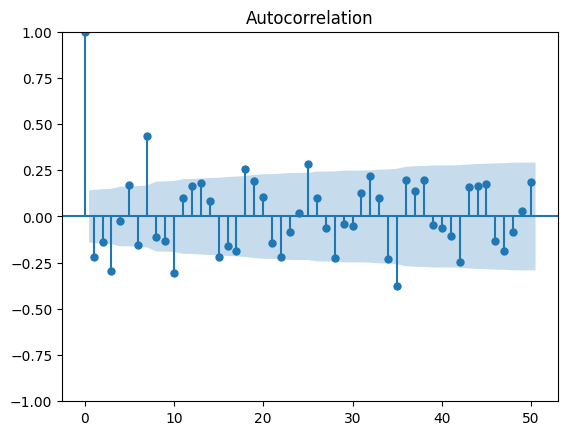

In [54]:
tsaplots.plot_acf(ts_season_diff.dropna(), lags=50);

In [56]:
# незакономерное изменение